In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_rating = pd.read_pickle('players_rating_clean.zip')
df_players = pd.read_csv('titled_players.csv', index_col=0)

In [3]:
df_rating.groupby('id').max().head()

,date,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
id,,,,,,,
100013,2021-09-01,2557.0,41.0,2470.0,17.0,2448.0,13.0
100021,2021-09-01,2503.0,22.0,NaN,NaN,NaN,NaN
100072,2021-09-01,2518.0,36.0,2422.0,9.0,2419.0,9.0
100080,2021-09-01,2425.0,0.0,NaN,NaN,NaN,NaN
100102,2021-09-01,2340.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df_rating.groupby('id').mean().head()

,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
id,,,,,,
100013,2465.524096,7.957831,2421.7,1.466667,2390.621622,0.297297
100021,2435.174699,0.277108,NaN,NaN,NaN,NaN
100072,2456.843373,4.493976,2420.5,4.500000,2398.000000,4.500000
100080,2425.000000,0.000000,NaN,NaN,NaN,NaN
100102,2340.000000,0.000000,NaN,NaN,NaN,NaN


In [5]:
df_merged = df_players.merge(df_rating.groupby('id').mean(), how='left', on='id')

In [6]:
df_merged.head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM),classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties
0,5813298,"Lim, Kok Ann",CM,NaN,SGP,NaN,NaN,NaN,1920.0,M,1,"['Candidate Master (CM)', '2012']",NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4611870,"Keller-Hermann, Edith",WGM,WGM,GER,2290.0,NaN,NaN,1921.0,F,0,"['Woman Grandmaster (WGM)', '1978', 'Woman Int...",NaN,NaN,NaN,NaN,1950.0,NaN,1978.0,NaN,2290.000000,0.000000,NaN,NaN,NaN,NaN
2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2275.000000,0.000000,NaN,NaN,NaN,NaN
3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2162.843373,1.445783,NaN,NaN,NaN,NaN
4,4101529,"Averbakh, Yuri L",GM,NaN,RUS,2445.0,NaN,NaN,1922.0,M,0,"['Grandmaster (GM)', '1952', 'International Ma...",NaN,NaN,NaN,NaN,NaN,1951.0,NaN,1952.0,2445.000000,0.000000,NaN,NaN,NaN,NaN


Toutes les variations d'elos lorsqu'il y a des parties jouées

In [7]:
test = df_rating.dropna(subset=['classique_parties'])[df_rating.dropna(subset=['classique_parties'])['classique_parties'] != 0]

In [8]:
df_players.head()

,id,nom,titre,woman_titre,pays,classique,rapide,blitz,naissance,sexe,actif,titre_dates,Woman Candidate Master (WCM),Candidate Master (CM),Woman FIDE Master (WFM),FIDE Master (FM),Woman International Master (WIM),International Master (IM),Woman Grandmaster (WGM),Grandmaster (GM)
0,5813298,"Lim, Kok Ann",CM,NaN,SGP,NaN,NaN,NaN,1920.0,M,1,"['Candidate Master (CM)', '2012']",NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4611870,"Keller-Hermann, Edith",WGM,WGM,GER,2290.0,NaN,NaN,1921.0,F,0,"['Woman Grandmaster (WGM)', '1978', 'Woman Int...",NaN,NaN,NaN,NaN,1950.0,NaN,1978.0,NaN
2,2002310,"Levy, Louis",FM,NaN,USA,2275.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14100657,"Ousatchi, Mark",FM,NaN,GER,2157.0,NaN,NaN,1921.0,M,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4101529,"Averbakh, Yuri L",GM,NaN,RUS,2445.0,NaN,NaN,1922.0,M,0,"['Grandmaster (GM)', '1952', 'International Ma...",NaN,NaN,NaN,NaN,NaN,1951.0,NaN,1952.0


In [9]:
test2 = test.merge(df_players[['id','titre','pays','naissance','sexe','actif']], how='left', on='id')

Voyons voir comment les saisons/mois de l'année influence sur les statistiques

In [10]:
test2.groupby('date').mean()

,id,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties,naissance,actif
date,,,,,,,,,
2000-01-01,4.417956e+06,2310.712878,18.378079,NaN,NaN,NaN,NaN,1968.137980,0.602569
2000-07-01,4.381389e+06,2313.164940,17.677889,NaN,NaN,NaN,NaN,1967.918083,0.609097
2000-10-01,4.726504e+06,2323.400381,11.862627,NaN,NaN,NaN,NaN,1969.407360,0.595495
2001-01-01,4.497416e+06,2312.196743,15.505207,NaN,NaN,NaN,NaN,1969.250426,0.615224
2001-04-01,4.915828e+06,2313.767399,11.234457,NaN,NaN,NaN,NaN,1970.723167,0.611197
...,...,...,...,...,...,...,...,...,...
2021-05-01,9.625597e+06,2249.850467,8.042835,2178.459933,1.242070,2176.132992,2.040068,1987.720187,1.000000
2021-06-01,9.928937e+06,2281.495286,7.240754,2221.390661,0.956420,2213.766929,0.829134,1987.233503,1.000000
2021-07-01,8.156880e+06,2246.908115,7.176014,2186.437281,1.390329,2171.507338,2.178197,1985.106205,1.000000


In [11]:
test2.groupby(['date','actif', 'titre']).mean()

id  classique_elo  classique_parties  \
date       actif titre                                                   
2000-01-01 0     CM     3.843323e+06    2175.597222          12.472222   
                 FM     4.095086e+06    2275.393717          12.640838   
                 GM     5.630504e+06    2474.962687          27.339552   
                 IM     5.154214e+06    2355.990640          19.365055   
                 WCM    8.068581e+06    2096.333333           5.333333   
...                              ...            ...                ...   
2021-09-01 1     IM     7.246601e+06    2356.773050           9.340426   
                 WCM    1.424942e+07    1746.040816           9.244898   
                 WFM    1.079172e+07    2036.323699          10.167630   
                 WGM    8.933658e+06    2257.631579           9.649123   
                 WIM    7.707029e+06    2127.831776           9.738318   

                         rapide_elo  rapide_parties    blitz_elo  \
date       actif titre                                             
2000-01-01 0     CM             NaN             NaN          NaN   
                 FM             NaN             NaN          NaN   
                 GM             NaN             NaN          NaN   
                 IM             NaN             NaN          NaN   
                 WCM            NaN             NaN          NaN   
...                             ...             ...          ...   
2021-09-01 1     IM     2309.481481        2.011272  2304.441640   
                 WCM    1619.480000        2.866667  1600.556962   
                 WFM    1920.051613        2.400000  1920.283871   
                 WGM    2187.442308        0.961538  2179.127273   
                 WIM    2045.677083        0.989583  2038.806452   

                        blitz_parties    naissance  
date       actif titre                              
2000-01-01 0     CM               NaN  1966.958333  
                 FM               NaN  1965.327749  
                 GM               NaN  1968.388060  
                 IM               NaN  1966.984375  
                 WCM              NaN  1972.666667  
...                               ...          ...  
2021-09-01 1     IM          3.048896  1981.659574  
                 WCM         4.582278  2002.989796  
                 WFM         3.251613  1994.826590  
                 WGM         2.127273  1985.543860  
                 WIM         1.838710  1989.308411  

[2467 rows x 8 columns]

In [12]:
test2.groupby(['date','actif', 'titre'],as_index=False).mean()

,date,actif,titre,id,classique_elo,classique_parties,rapide_elo,rapide_parties,blitz_elo,blitz_parties,naissance
0,2000-01-01,0,CM,3.843323e+06,2175.597222,12.472222,NaN,NaN,NaN,NaN,1966.958333
1,2000-01-01,0,FM,4.095086e+06,2275.393717,12.640838,NaN,NaN,NaN,NaN,1965.327749
2,2000-01-01,0,GM,5.630504e+06,2474.962687,27.339552,NaN,NaN,NaN,NaN,1968.388060
3,2000-01-01,0,IM,5.154214e+06,2355.990640,19.365055,NaN,NaN,NaN,NaN,1966.984375
4,2000-01-01,0,WCM,8.068581e+06,2096.333333,5.333333,NaN,NaN,NaN,NaN,1972.666667
...,...,...,...,...,...,...,...,...,...,...,...
2462,2021-09-01,1,IM,7.246601e+06,2356.773050,9.340426,2309.481481,2.011272,2304.441640,3.048896,1981.659574
2463,2021-09-01,1,WCM,1.424942e+07,1746.040816,9.244898,1619.480000,2.866667,1600.556962,4.582278,2002.989796
2464,2021-09-01,1,WFM,1.079172e+07,2036.323699,10.167630,1920.051613,2.400000,1920.283871,3.251613,1994.826590
2465,2021-09-01,1,WGM,8.933658e+06,2257.631579,9.649123,2187.442308,0.961538,2179.127273,2.127273,1985.543860


In [13]:
test2.groupby(['date','titre']).mean()[['classique_elo', 'classique_parties']][:100]

classique_elo  classique_parties
date       titre                                  
2000-01-01 CM       2173.431694          10.333333
           FM       2263.688532          12.652387
           GM       2458.186888          29.562622
           IM       2344.881477          20.802859
           WCM      2069.555556           6.555556
...                         ...                ...
2003-04-01 CM       2162.694268           8.719745
           FM       2255.148560           9.786649
           GM       2456.903926          15.917355
           IM       2342.567093          12.992013
           WCM      2008.500000           4.700000

[100 rows x 2 columns]

In [14]:
test2.groupby(['date']).agg({'classique_elo':'mean','classique_parties':'mean'})

,classique_elo,classique_parties
date,,
2000-01-01,2310.712878,18.378079
2000-07-01,2313.164940,17.677889
2000-10-01,2323.400381,11.862627
2001-01-01,2312.196743,15.505207
2001-04-01,2313.767399,11.234457
...,...,...
2021-05-01,2249.850467,8.042835
2021-06-01,2281.495286,7.240754
2021-07-01,2246.908115,7.176014


In [15]:
test2.groupby(['date','actif', 'titre'],as_index=False).mean()[['date','actif', 'classique_elo', 'classique_parties']]

,date,actif,classique_elo,classique_parties
0,2000-01-01,0,2175.597222,12.472222
1,2000-01-01,0,2275.393717,12.640838
2,2000-01-01,0,2474.962687,27.339552
3,2000-01-01,0,2355.990640,19.365055
4,2000-01-01,0,2096.333333,5.333333
...,...,...,...,...
2462,2021-09-01,1,2356.773050,9.340426
2463,2021-09-01,1,1746.040816,9.244898
2464,2021-09-01,1,2036.323699,10.167630
2465,2021-09-01,1,2257.631579,9.649123


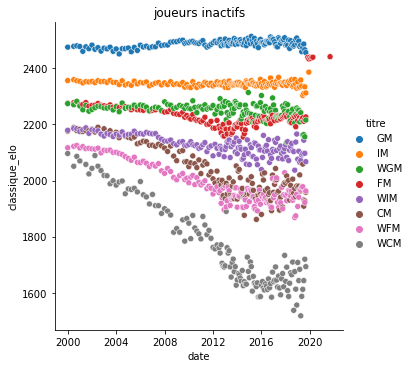

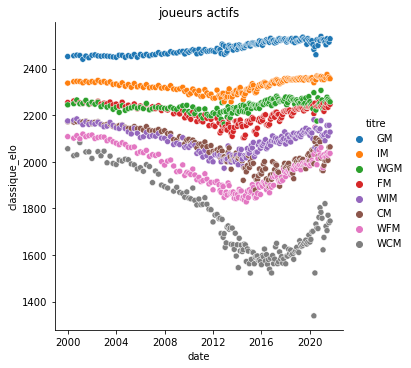

In [16]:
hue_order = ['GM', 'IM', 'WGM', 'FM', 'WIM', 'CM', 'WFM', 'WCM']
test3 = test2.groupby(['date','actif', 'titre'],as_index=False).mean()[['date','titre','actif','classique_elo','classique_parties']]
sns.relplot(data=test3[test3['actif']==0], 
           x='date', 
           y="classique_elo",  
           hue="titre",
           hue_order=hue_order)
plt.title('joueurs inactifs')
sns.relplot(data=test3[test3['actif']==1], 
           x='date', 
           y="classique_elo",  
           hue="titre",
           hue_order=hue_order)
plt.title('joueurs actifs')
plt.show()


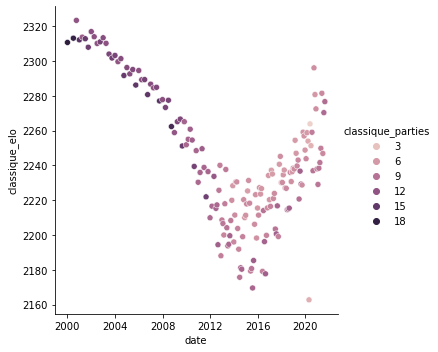

In [17]:
sns.relplot(data=test2.groupby('date').mean()[['classique_elo', 'classique_parties']], 
           x='date', 
           y="classique_elo",  
           hue="classique_parties")
plt.show()

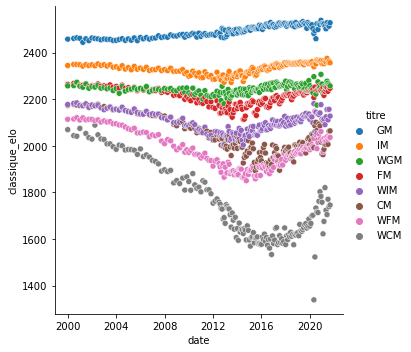

In [18]:
# sns.relplot(data = test.groupby('date').mean()[['classique_elo', 'classique_parties']], kind="line",
#             x='date',
#             y = 'classique_elo', 
#             hue='classique_parties')
# sns.relplot(data = test.groupby('date').mean()[['classique_elo', 'classique_parties']], kind="line",
#             x='date',
#             y = 'classique_elo')
# sns.relplot(data=test2.groupby('date').mean()[['classique_elo', 'classique_parties']], 
#            x='date', 
#            y="classique_elo",  
#            hue="classique_parties")
hue_order = ['GM', 'IM', 'WGM', 'FM', 'WIM', 'CM', 'WFM', 'WCM']
sns.relplot(data=test2.groupby(['date','titre']).mean()[['classique_elo', 'classique_parties']], 
           x='date', 
           y="classique_elo",  
           hue="titre",
           hue_order=hue_order, kind='scatter')
plt.show()

In [19]:
test2.groupby(['date','actif', 'titre'],as_index=False).mean()[['classique_elo', 'classique_parties']]

,classique_elo,classique_parties
0,2175.597222,12.472222
1,2275.393717,12.640838
2,2474.962687,27.339552
3,2355.990640,19.365055
4,2096.333333,5.333333
...,...,...
2462,2356.773050,9.340426
2463,1746.040816,9.244898
2464,2036.323699,10.167630
2465,2257.631579,9.649123


Il semblerait qu'il y'a eu un manque de popularité en 2016, cela est plus accentué chez les femmes

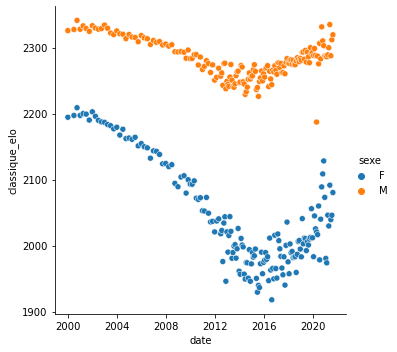

In [20]:
sns.relplot(data=test2.groupby(['date','sexe']).mean()[['classique_elo', 'classique_parties']], 
           x='date', 
           y="classique_elo",  
           hue="sexe")
plt.show()

Pistes à suivre : faire de même pour les différents titres, gm, master etc

In [21]:
# A compléter

Essayons quel année a été la plus fructueuse aux niveaux des personnes qui ont reçus des titres

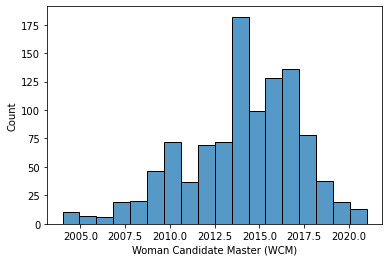

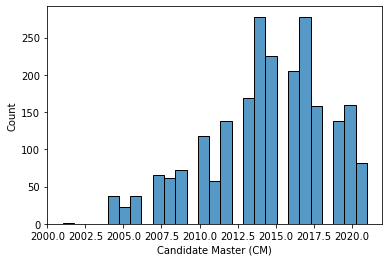

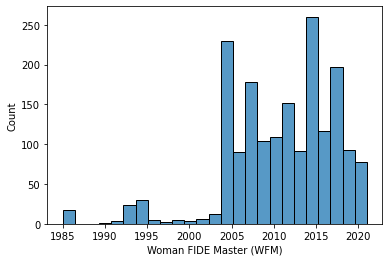

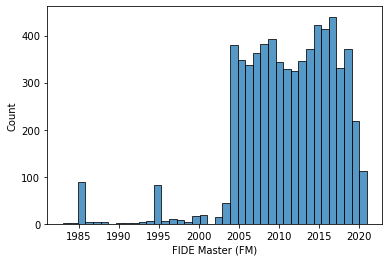

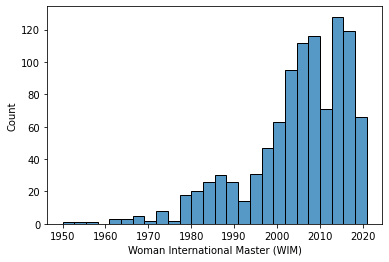

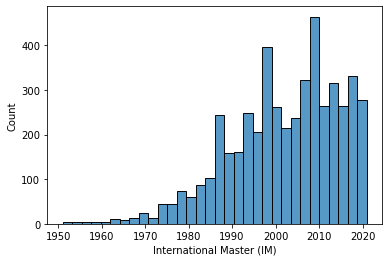

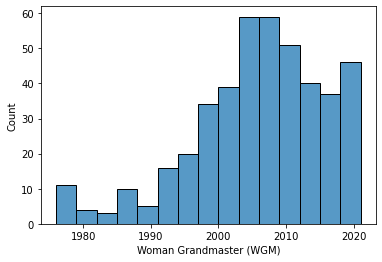

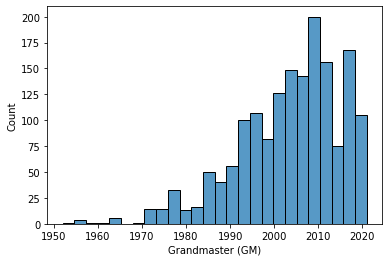

In [26]:
for col in df_players.columns[-8:]:
#     print(col,'\n\n',df_players[col].value_counts(normalize=True).sort_index())
    sns.histplot(data=df_players, x=col)
    plt.show()


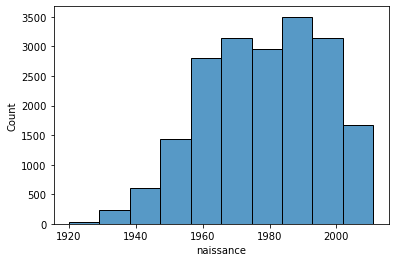

In [30]:
sns.histplot(data = df_players, x='naissance', bins = 10)
plt.show()